# 머신러닝 3장 회귀 알고리즘과 모델 규제

# k-최근접 이웃 회귀

In [1]:
# 회귀(Regression)
## 지도 학습(Supervised Learning)
### 훈련을 위한 데이터(training data)와 정답이 필요
# - 훈련 데이터 = 입력(input) + 정답(target)
### 알고리즘이 정답을 맞추는지 학습

## 분류
# - 테스트 세트의 샘플을 정확하게 분류한 개수의 비율: 정확도
# -정답을 맞힌 개수의 비율 (정확도)

## 회귀
# - 두 변수 사이의 상관 관계를 분석하는 방법
# - 기존 데이터를 이용해서 임의의 숫자를 예측하는 문제: 결정계수(R2)
# - 정확한 숫자를 맞춘다는 것은 불가능
# - Example
# 내년 경제 성장률 예측
# 배달 도착 시간 예측
# 농어의 무게 예측

In [2]:
# K-최근접 이웃 회귀
## k-최근접 이웃 분류(2장)
### 예측하려는 샘플에 가장 가까운 이웃을 k개를 선택
### 이웃들의 클래스를 확인
### 샘플 주변의 다수의 클래스를 샘플의 클래스로 예측 ###

## k-최근접 이웃 회귀
### 예측하려는 샘플에 가장 가까운 이웃 k개를 선택
### 이웃의 평균을 구함 ###

In [3]:
# 농어(perch)의 길이로 무게를 잘 예측할 수 있을까?
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0,
                         300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0,
                         685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

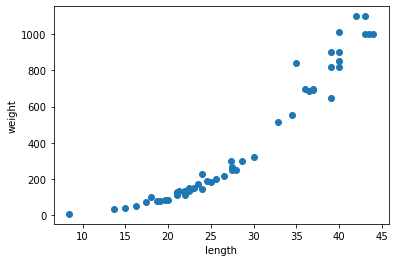

In [4]:
# 산점도 확인
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 훈련 세트와 테스트 세트 준비
# train_test_split() 함수 사용
## 1개의 데이터 세트(perch_length)만 사용

# scikit-learn의 훈련 세트는 2차원 배열을 사용
## 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
## reshape(row, col) 함수 사용
## (42,) -> (42, 1)형태로 변경

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
# reshape(-1, 1): -1: 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1) # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [6]:
### k-최근접 이웃 회귀 알고리즘 ###
## KNeighborsRegressor 클래스 사용
# - n_neighbors: 기본 값=5

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
# 모델 훈련
knr.fit(train_input, train_target)

# score(): 훈련 모델 점수 확인, 결정 계수(R2)를 리턴
print(knr.score(test_input, test_target))  # 검증용 데이터로 모델 평가

#score()
# – 결정 계수(R2)를 리턴함
# – 출력하는 값이 높을수록 정확도가 높음

0.992809406101064


In [7]:
# 결정 계수 (R2) 값
## 회귀식이 얼마나 정확한지를 나타내는 숫자 (0 ≤ R2 ≤ 1))
# - 0에 가까울수록, 회귀식의 정확도는 낮음
# - 1에 가까울수록, 회귀식의 정확도는 높음

In [8]:
# mean_absolut_error                            # p.10
# mean_absolut_error (MAE) : 평균 절대 오차
## 타깃(실제 값)과 예측 값의 절대값 오차 평균

## 절대값을 사용: 에러의 크기를 반영
## sklearn.merics 패키지 포함
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 19g 정도의 오차 발생

19.157142857142862


In [9]:
# 과대적합 vs 과소적합
# 과대적합(overfitting)
## 훈련 세트에만 잘 맞는 모델
# - 테스트 세트에서는 점수가 굉장히 나쁨
# - 일반성이 떨어짐

# 과소적합(underfitting)
## 훈련 세트보다 테스트 세트의 점수가 높거나,
## 훈련 세트와 테스트 세트의 두 점수가 모두 낮음
# - 모델이 너무 단순해서 훈련 세트로 훈련이 되지 않은 경우

# 앞 예제에서 훈련 세트와 테스트 세트의 score() 비교
## 테스트 세트의 점수가 더 높음: 과소 적합(underfitting)

# 테스트 세트를 사용하여 R2값 계산
print(knr.score(test_input, test_target))

# 훈련 세트 R2값 계산
print(knr.score(train_input, train_target))

0.992809406101064
0.9698823289099254


In [10]:
### 모델 개선: 이웃 개수 줄이기 ###
# 과소 적합 해결 방안: 이웃의 개수 줄임
## 기본 값 5에서 n_neighbors = 3으로 변경
# - 모델이 더 복잡해짐
# - 훈련 세트의 국지적 패턴에 더 민감해짐

knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print("훈련 데이터로 모델의 정확도 점수 계산: ",
      knr.score(train_input, train_target))

print("테스트 데이터로 모델의 정확도 점수 계산: ",
      knr.score(test_input, test_target))

훈련 데이터로 모델의 정확도 점수 계산:  0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산:  0.9746459963987609


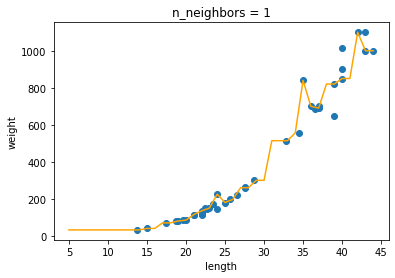

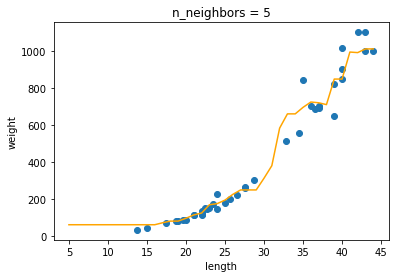

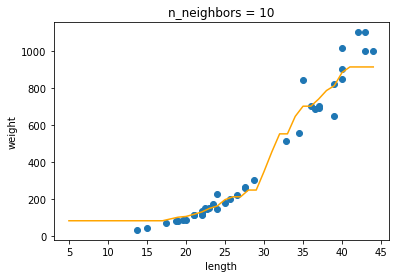

In [11]:
# 이웃의 수에 따른 그래프 비교
## k-최근접 회귀 알고리즘에서 이웃의 수 변경: 1, 5, 10
### 농어의 길이를 5~45까지 변경하면서 무게 예측

# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

# x:농어의 길이(5~45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)
# n=1, 5, 10일때 예측 결과 그래프
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange')
    
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 마무리 정리
## 회귀(Regression)
- 임의의 수치를 예측하는 문제
- k-최근접 이웃 회귀
 - 가장 가까운 이웃 샘플을 찾고 타깃값을 평균하여 예측
 
## 과대 적합(Overfitting)
- 훈련 세트에만 잘 맞음 (일반성이 떨어짐)
- 훈련 세트의 성능 > 테스트 세트 성능

## 과소 적합(Underfitting)
- 모델이 단순하여 훈련세트의 패턴을 모두 잡아내지 못함
- 훈련 세트와 테스트 세트의 성능이 모두 낮거나
- 훈련 세트의 성능 < 테스트 세트의 성능

In [12]:
##################################################

# 선형 회귀

In [13]:
# k- 최근접 이웃 알고리즘의 문제점
## 가장 가까운 샘플을 찾아 평균값 계산
## 새로운 샘플이 훈련 세트의 범위를 벗어나면 잘못된 예측을 함
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0,
                         300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0,
                         685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0,
                         820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [14]:
# 훈련 세트 밖의 샘플 예측
## 50cm, 100cm 길이의 농어 무게 예측: 동일한 예측값
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

print('50cm:', knr.predict([[50]]))           # 100cm 농어의 예측값은
print('100cm:', knr.predict([[100]]))         # 50cm 농어의 예측값과
                                              # 동일: 1033g

50cm: [1033.33333333]
100cm: [1033.33333333]


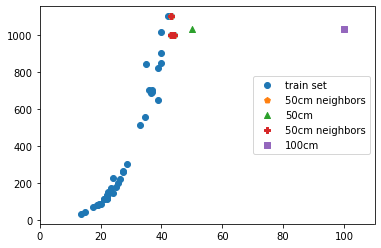

In [15]:
### 50cm, 100cm 길이의 농어의 이웃 및 산점도 비교 ###

# 50cm 농어의 이웃을 구함
distances_50, indexes_50 = knr.kneighbors([[50]])
# 100cm 농어의 이웃을 구함
distances_100, indexes_100 = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target, label='train set')

# 훈련 세트 중에서 50cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_50], train_target[indexes_100],
           marker='p', label='50cm neighbors')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^', label='50cm')

# 훈련 세트 중에서 100cm 농어의 이웃 데이터만 다시 그림
plt.scatter(train_input[indexes_100], train_target[indexes_100],
marker='P', label='50cm neighbors')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='s', label='100cm')

plt.xlim(0, 110)
plt.legend(loc=5)
plt.show()

In [16]:
### 50cm 농어와 100cm 농어의 이웃 비교
# 훈련데이터에서 이웃 데이터의 인덱스 확인
print('50cm neighbor indexes:', indexes_50)
print('100cm neighbor indexes:', indexes_100)

print('--------------------------------------')
# 이웃 데이터의 무게 평균 계산
print(np.mean(train_target[indexes_50]))
print(np.mean(train_target[indexes_100]))

50cm neighbor indexes: [[34  8 14]]
100cm neighbor indexes: [[34  8 14]]
--------------------------------------
1033.3333333333333
1033.3333333333333


In [17]:
### k-최근접 이웃 회귀: 이웃의 평균을 구함
### - 50cm 농어의 이웃과 100cm 농어의 이웃이 동일함
### - 서로 다른 길이의 무게 예측: 이웃의 평균값을 사용
### - 50cm 농어와 100cm 농어의 무게 예측값(1033g)이 동일한 문제점 발생
# p.20

In [18]:
# 선형 회귀
## 데이터를 가장 잘 표현할 수 있는 직선 방정식을 찾는 알고리즘
## 특성과 타깃 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음
# - 특성과 타깃 사이의 관계: 선형 방정식의 계수(기울기) 와 절편에 저장

# LinearRegression 클래스 사용
# - sklearn.linear_model 패키지
# - fit(), score(), predict() 메소드

##### 머신러닝 알고리즘이 해당 직선을 찾음 ##### p.21

In [19]:
# 훈련 데이터를 이용한 직선 방정식 구하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)
# 50cm 농어에 대한 예측
print('50cm: ', lr.predict([[50]]))

# 기울기(a): coef_, 절편(bias): intercept_
print(lr.coef_, lr.intercept_)
# 하나의 특성(농어의 길이)만 사용했기 때문에 배열의 원소는 1개
# 농어 무게 = aX농어 길이 + b

50cm:  [1241.83860323]
[39.01714496] -709.0186449535477


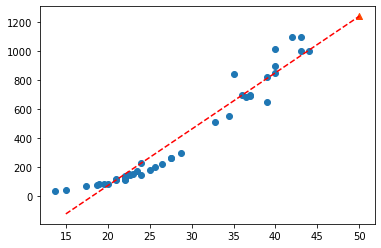

train data score:  0.939846333997604
test data score:  0.8247503123313558


In [20]:
# 기울기와 절편을 이용한 1차 방정식 그래프
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
# plot([x축 데이터:시작, 끝], [y축 데이터:시작, 끝])
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^', color='orangered')
plt.show()

print('train data score: ',
     lr.score(train_input, train_target))
print('test data score: ',
     lr.score(test_input, test_target))   # 전체적으로 과소 적합(훈련 세트와
                                          # 테스트 세트의 점수가 모두 낮음)

In [21]:
# 다항 회귀(Polynomial Regression)
## 농어의 길이와 무게에 대한 산점도
### 일직선(1차 방정식)으로 표현하기 어려움
### 무게가 0 이하일 가능성 발생
# - 모델이 더 복잡할 필요성이 있음

## 최적의 곡선(2차 방정식)을 구함
### 길이를 제곱한 항을 훈련 세트에 추가해야 됨
# 농어 무게 = a x 길이(제곱) + b x 길이 + c

In [22]:
### 훈련 세트에 데이터 추가 ###
# 길이를 제곱한 데이터를 훈련 세트에 추가
## column_stack()사용
# - broadcasting 적용
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly[0:5])
print(train_poly.shape, test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


In [23]:
### 다항 회귀식 구하기 ###
# 선형 회귀 모델 재훈련
## 제곱한 데이터를 이용하여 선형 회귀 모델을 다시 훈련
## 타깃값은 그대로 사용함
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 50cm 농어의 무게 예측
print(lr.coef_, lr.intercept_)
## 농어무게 = 𝛼×길이0 + 𝑏×길이+ 𝑐 = 1.01×길이0 − 21.6×길이+ 116.05

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259


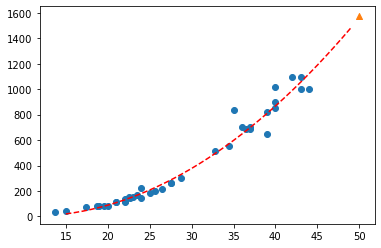

0.9706807451768623
0.9775935108325121


In [24]:
### 다항 회귀식을 이용한 그래프 그리기 ###
## 훈련 세트의 산점도와 2차 방정식 그래프
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듬
point = np.arange(15, 50)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05,
        color='red', linestyle='--')

# 50cm 농어 데이터 (무게:1574g)
plt.scatter([50], [1574], marker='^')
plt.xlabel='length'
plt.ylabel='weight'
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 테스트 세트의 점수가 높음 - 과소 적합이 남아 있음

# 내용 정리
## k-최근접 이웃 회귀
- 거리에 상관 없이 가장 가까운 이웃의 값을 평균하여 예측
 - 50cm와 100cm 길이의 농어 무게를 동일하게 예측
- 훈련 세트 범위 밖의 샘플을 예측할 수 없음
## 선형 회귀
- 훈련 세트에 잘 맞는 직선 방정식을 구함
 - 기울기(coef_)와 절편(intercept_)을 계산
- 훈련 세트를 벗어난 범위의 데이터를 예측할 수 있음
- 모델이 단순: 농어의 무게가 음수일 가능성 발생
## 다항 회귀
- 선형 회귀의 문제점을 해결하기 위해 다항 회귀 사용
- 2차 방정식의 그래프 형태
- 여전히 과속 적합이 존재

In [25]:
################################################################

# 특성 공학과 규제

In [26]:
# 다중 회귀 (Multiple Regression)
# 다중 회귀
## 여러 특성을 사용한 선형 회귀
# - 길이, 높이, 두께 사용
# - 다양한 특성의 조합을 생성
## PolynomialFeatures 클래스 사용

# 특성 공학 (Featire engineering)
## 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업

### 특성이 2개인 경우, 평면을 학습 ###

In [27]:
### Pandas로 데이터 준비 ###
# 데이터 준비 - https://bit.ly/perch_csv

import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy() # DataFrame을 Numpy의 array로 변환
print(perch_full[:5])
print(perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]
(56, 3)


In [28]:
### 훈련 세트와 테스트 세트로 분리 ###
# target 데이터 (perch_weight)는 기존과 동일
# perch_full, perch_weight를 훈련 세트와 테스트 세트로 분리

import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state = 42)

In [29]:
### 사이킷런의 변환기 (Transformer) ###
## 다항 특성 만들기 ##
# PolynomialFeatures 클래스 사용
# - 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가

# PolynomialFeautres(include_bias=True)
# - include_bias=True: bias(절편, 0차항) 추가
# - include_bias=False: bias 삭제

# fit([a, b]): 특성 조합을 찾음
# - [1, a, b, a*b, a^2, b^2] 추가

# transform([[a, b]]): 특성 조합을 실제 데이터로 변환
# - [1, a, b, a*b, a^2, b^2] 로 변환

In [30]:
### PolynomialFeaures 간단 예제
# PolynomialFeatures(include_bias=True)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()     # include_bias=True (기본값)
poly.fit([[2, 3]])              # 2, 3의 조합을 찾음 (2^2, 3^2, 2x3)
print(poly.transform([[2, 3]])) # 특성 조합을 데이터로 변환

[[1. 2. 3. 4. 6. 9.]]


In [31]:
# PolynomialFeatures(include_bias=False)
poly = PolynomialFeatures(include_bias=False)   # include_bias=False: 1제거
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [32]:
### 다항 특성 만들기 ###
# 훈련 세트(train_input)을 사용하여 다항 특성 만들기
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)   # train_input 데이터를 이용하여
                                           # 총 9개의 특성이 만들어짐
print(train_poly[0:3])
print(train_poly.shape)
test_poly = poly.transform(test_input)    # 테스트 세트 변환: fit() 호출 안함
# test_poly = 훈련 세트를 기준으로 만들어진 특성을 이용하여 테스트 세트를
#             변환하기 위함.

[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
(42, 9)


In [33]:
# get_features_names()
## 각 특성의 조합을 알려줌
print(poly.get_feature_names())

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
### 다중 회귀 모델 훈련1 ### 
# 다중 회귀 모델 훈련
## 선형 회귀 모델 훈련과 동일 (여러 개의 특성을 사용할 뿐임)
# - 특성이 늘어나면 선형 회귀의 정확도 증가
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [35]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [36]:
### 다중 회귀 모델 훈련2 ###
# degree 증가
## 고차항의 최대 차수 지정
## 3제곱, 4제곱, 5제곱 항 추가

# 고차항의 최대 차수 증가 (5차)
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [37]:
# 선형 회귀 모델 훈련 및 점수 계산
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 테스트 세트 점수 계산
print(lr.score(test_poly, test_target))     # 훈련 세트에 과대 적합

0.9999999999938143
-144.40744532797535


# 규제 (Regularization)
## 규제
- 모델이 훈련 세트에 과대 적합되는 것을 방지-overfitting 방지
- 선형 회귀 모델: 특성에 곱해지는 계수의 크기를 작게 줄임
- L1 규제(L1 Regularization)
 - 계수(가중치)의 합을 더한 값에 규제 강도(A)를 곱하여 오차에 더함
 - 어떤 가중치는 0이 됨
- L2 규제(L2 Regularization)
 - 각 계수(가중치) 제곱의 합에 규제 강도(A)를 곱함
 - A를 크게 하면 가중치가 더 감소(규제 강화), A를 작게 하면 가중치가 증가

## 규제 전에 표준화 과정이 필요
- 각 특성의 크기(스케일)가 다르기 때문에 표준화 과정이 필요
- StandardScaler 클래스 사용

# 표준화
## StandardScaler 클래스를 사용한 표준화
- 평균과 표준 편차 사용
- fit(), transform() 사용
### from sklearn.preprocessing import StandardScaler
### ss = StandardScaler()
### ss.fit(train_poly)
### train_scaled = ss.transform(train_poly)
### test_scaled = ss.transform(test_poly)

## 규제 모델
#### 릿지(Ridge) 모델: L2 regularization
-계수를 제곱한 값을 기준으로 규제

#### 라쏘(Lasso) 모델: L1 regularization
-계수(가중치)의 절대값을 기준으로 규제

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [41]:
### 릿지 회귀 ###
# sklearn.linear_model 패키지
# fit()로 훈련, score()메소드로 평가
# Ridge(alpha=1.0)
## alpha값이 크면 규제 강도가 세짐 (계수 값을 더 줄임)
from sklearn.linear_model import Ridge

ridge = Ridge() # alpha=1.0
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target)) #훈련 세트 점수 확인

0.9896101671037343


In [42]:
# 테스트 세트의 점수가 정상으로 돌아옴
print(ridge.score(test_scaled, test_target))

0.9790693977615386


TypeError: 'str' object is not callable

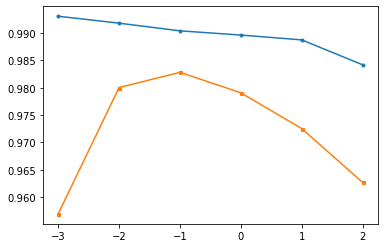

In [49]:
# ### 릿지 회귀: 적절한 규제 강도 찾기 ###
# #적절한 alpha 값 찾기
# ## alpha값을 변경하면서 결정 계수(R2)의 값을 비교
#  ## alpha=0.1 (-1은 log 적용 10-1)일 때, 두 그래프가 가장 가까움

# # 적절한 alpha값 찾기
# import matplotlib.pyplot as plt
# train_score = []
# test_score = []

# alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# for alpha in alpha_list:
#     ridge = Ridge(alpha=alpha)
#     ridge.fit(train_scaled, train_target)
#     #훈련 세트와 테스트 세트 점수를 저장
#     train_score.append(ridge.score(train_scaled, train_target))
#     test_score.append(ridge.score(test_scaled, test_target))
    
# plt.plot(np.log10(alpha_list), train_score,
#          label='train_set score', marker='o', markersize=3)
# plt.plot(np.log10(alpha_list), test_score,
#          label='test_set score', marker='s', markersize=3)
# plt.xlabel('alpha')
# plt.ylabel('R^2')
# plt.legend()
# plt.show()  